In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
np.random.seed(42)

In [112]:
path = r"regress_data1.csv"
data = pd.read_csv(path)
data.head()
data.shape

(96, 2)

In [94]:
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False#正常显示负号

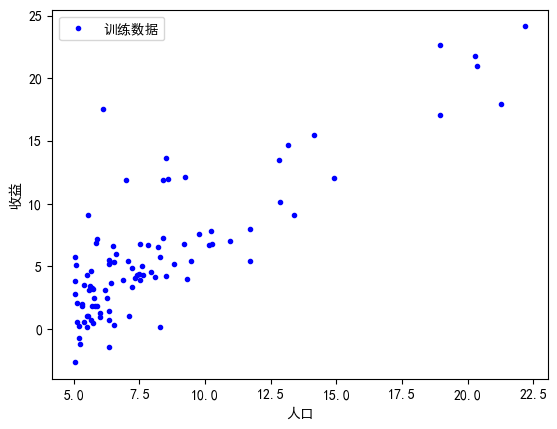

In [95]:
#数据可视化显示
data = np.asarray(data)
cols = data.shape[1]
X = data[:,:cols-1]
y = data[:,cols-1]
plt.plot(X,y,'b.',label='训练数据')
plt.xlabel('人口')
plt.ylabel('收益')
plt.legend()
plt.show()

In [96]:
data = np.c_[np.ones((96,1)),data]
data.shape

(96, 3)

In [97]:
cols = data.shape[1]
X_b = data[:,:cols-1]
y = data[:,cols-1:]#标签
X_b.shape

(96, 2)

In [98]:
#公式求解
theta = np.dot(np.dot(np.linalg.inv(np.dot(X_b.T,X_b)),X_b.T), y)
print(theta)

[[-3.84413617]
 [ 1.18923711]]


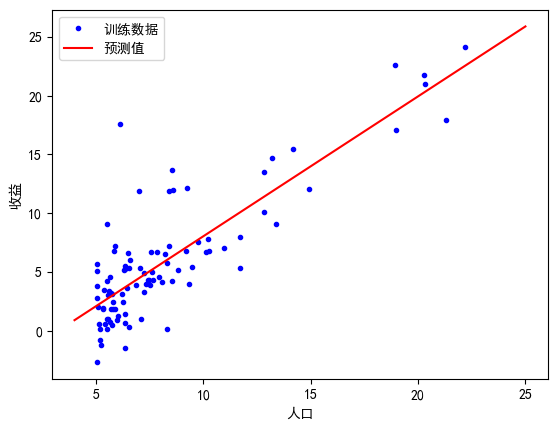

In [99]:
x = np.linspace(4,25,100)
f = (theta[0] + (theta[1] * x)).T
plt.plot(X,y,'b.',label = '训练数据')
plt.plot(x,f,'r',label = '预测值')
plt.xlabel('人口')
plt.ylabel('收益')
plt.legend()
plt.show()

In [100]:
eta = 0.01 #学习率
n_iterations = 2000
m = 96
theta = np.random.randn(2,1)
for iteration in range(n_iterations):
    grad = 2/m * (np.dot(X_b.T,(np.dot(X_b, theta)-y)))
    theta = theta - eta * grad
print(theta)

[[-3.84087265]
 [ 1.18891029]]


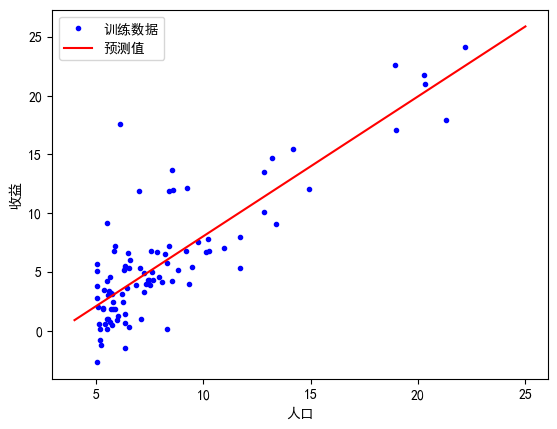

In [101]:
f = (theta[0] + (theta[1] * x)).T
plt.plot(X,y,'b.',label = '训练数据')
plt.plot(x,f,'r',label = '预测值')
plt.xlabel('人口')
plt.ylabel('收益')
plt.legend()
plt.show()

In [102]:
path = r"regress_data2.csv"
data2 = pd.read_csv(path)
data2.head()

,面积,房间数,价格
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [103]:
data2 = np.asarray(data2)

In [104]:
from sklearn import preprocessing
data2 = preprocessing.scale(data2)
data2.mean(axis = 0)
data2.std(axis = 0)

array([1., 1., 1.])

In [105]:
data2.shape

(47, 3)

In [106]:
data2 = np.c_[np.ones((47,1)),data2]
cols = data2.shape[1]
X_b = data2[:,:cols-1]
y = data2[:,cols-1:]#标签
X_b.shape

(47, 3)

In [107]:
eta = 0.01 #学习率
n_iterations = 2000
m = 47
theta = np.random.randn(3,1)
for iteration in range(n_iterations):
    grad = 2/m * (np.dot(X_b.T,(np.dot(X_b, theta)-y)))
    theta = theta - eta * grad
print(theta)

[[-7.16394720e-17]
 [ 8.84765996e-01]
 [-5.31788283e-02]]


In [108]:
theta_path_bgd = []
def plot_grad_descent(theta,eta,theta_path = None):
    m = len(X_b)
    plt.plot(X,y,'b.')
    n_iterations = 1000
    for iteration in range(n_iterations):
        f = (theta[0]+(theta[1]*x)).T
        plt.plot(x,f,'r-')
        grad = 2/m * (np.dot(X_b.T,(np.dot(X_b, theta)-y)))
        theta = theta-eta*grad
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel('人口')
    plt.ylabel('收益')
    plt.title('eta = {}'.format(eta))
    plt.show()

In [109]:
theta = np.random.randn(2,1)

In [ ]:
plt.figure(figsize = (6,12))
plt.subplot(311)
plot_grad_descent(theta,eta = 0.001,theta_path = theta_path_bgd)
plt.figure(figsize = (6,12))
plt.subplot(312)
plot_grad_descent(theta,eta = 0.005,theta_path = theta_path_bgd)
plt.figure(figsize = (6,12))
plt.subplot(313)
plot_grad_descent(theta,eta = 0.01,theta_path = theta_path_bgd)
plt.show()

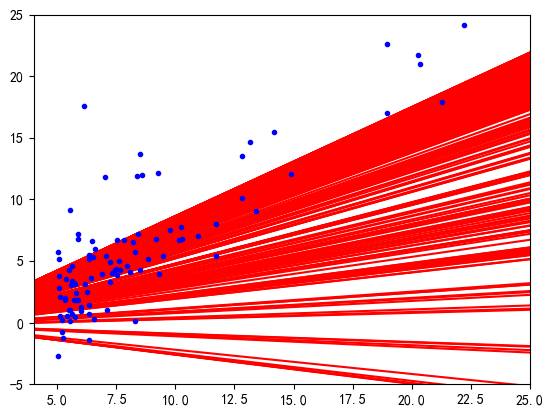

In [ ]:
theta_path_sgd = []
m = len(X_b)
n_epochs = 50
t0 = 5
t1 = 500

def learning_rate(t):
    return t0/(t1+t)

theta = np.random.randn(2,1)

for epoch in range(n_epochs):
    for i in range(m):
        f = (theta[0] + (theta[1]*x)).T
        plt.plot(x,f,'r-')
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        grad = grad = 2/m * (np.dot(xi.T,(np.dot(xi, theta)-yi)))
        eta = learning_rate(epoch*m+i)
        theta = theta - eta*grad
        theta_path_sgd.append(theta)
plt.plot(X,y,'b.')
plt.axis([4,25,-5,25])
plt.show()
        

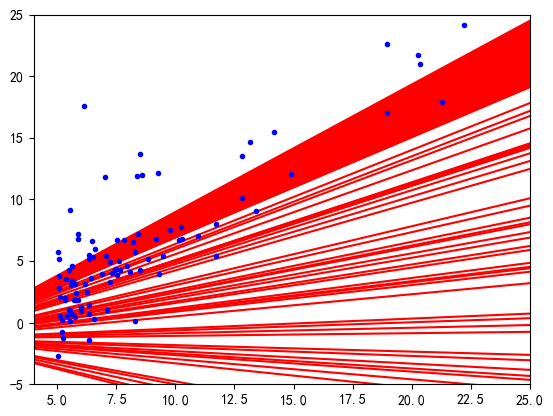

In [ ]:
theta_path_sgd = []
m = len(X_b)
n_epochs = 20
t0 = 5
t1 = 500



theta = np.random.randn(2,1)

for epoch in range(n_epochs):
    for i in range(m):
        f = (theta[0] + (theta[1]*x)).T
        plt.plot(x,f,'r-')
        random_index = np.random.randint(m-6)
        xi = X_b[random_index:random_index+5]
        yi = y[random_index:random_index+5]
        grad = grad = 2/m * (np.dot(xi.T,(np.dot(xi, theta)-yi)))
        eta = 0.005
        theta = theta - eta*grad
        theta_path_sgd.append(theta)
plt.plot(X,y,'b.')
plt.axis([4,25,-5,25])
plt.show()

In [113]:
m = 100
X = 6*np.random.rand(m,1) - 3
y = 0.5*X**2+X+np.random.randn(m,1)

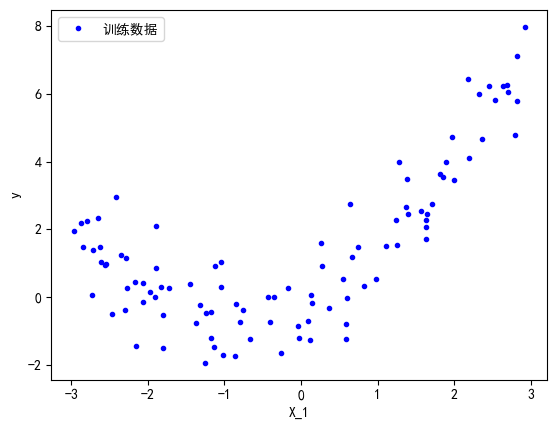

In [114]:
plt.plot(X,y,'b.',label = '训练数据')
plt.xlabel('X_1')
plt.ylabel('y')
plt.legend()
plt.show()

In [115]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree = 2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [116]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_poly,y)
print(lin_reg.coef_)
print(lin_reg.intercept_)

[[0.93366893 0.56456263]]
[-0.21865419]


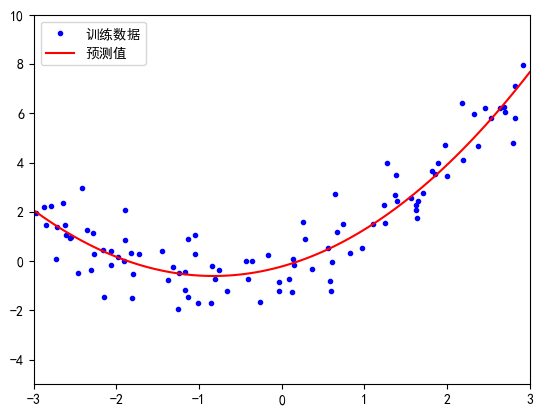

In [117]:
X_new = np.linspace(-3,3,100).reshape(100,1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X,y,'b.',label = '训练数据')
plt.plot(X_new,y_new,'r-',label = '预测值')

plt.axis([-3,3,-5,10])
plt.legend()
plt.show()

In [118]:
from sklearn.linear_model import Ridge
model = Ridge(alpha = 10)

In [119]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=10,include_bias=False)
X_poly = poly_features.fit_transform(X)
X_poly.shape

(100, 10)

In [120]:
model.fit(X_poly,y)
model.score(X_poly,y)

0.8511677515973077

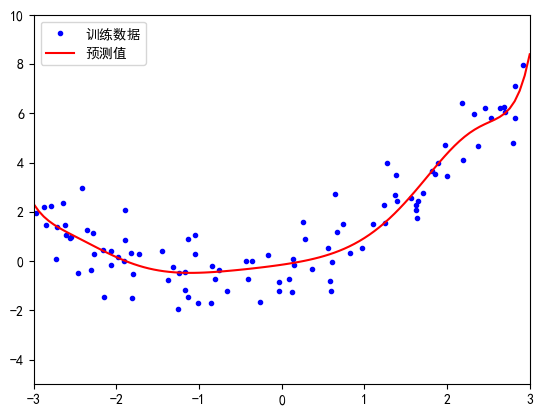

In [121]:
X_new = np.linspace(-3,3,100).reshape(100,1)
X_new_poly = poly_features.transform(X_new)
y_new = model.predict(X_new_poly)
plt.plot(X,y,'b.',label = '训练数据')
plt.plot(X_new,y_new,'r-',label = '预测值')
plt.axis([-3,3,-5,10])
plt.legend()
plt.show()

In [122]:
from sklearn.linear_model import Lasso
model = Lasso(alpha = 100)
poly_features = PolynomialFeatures(degree = 5,include_bias=False)
X_poly = poly_features.fit_transform(X)
X_poly.shape
model.fit(X_poly,y)

Lasso(alpha=100)

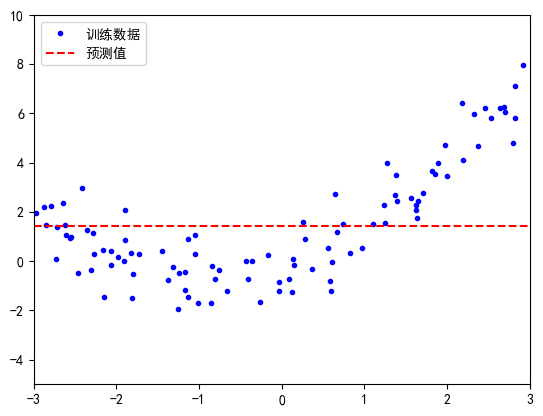

In [123]:
X_new = np.linspace(-3,3,100).reshape(100,1)
X_new_poly = poly_features.transform(X_new)
y_new = model.predict(X_new_poly)
plt.plot(X,y,'b.',label = '训练数据')
plt.plot(X_new,y_new,'r--',label = '预测值')
plt.axis([-3,3,-5,10])
plt.legend()
plt.show()

In [124]:
path = 'ex2data1.txt'
data = pd.read_csv(path, header=None, names=['Exam 1','Exam 2', 'Admitted'])
data.head()

,Exam 1,Exam 2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [125]:
data.shape

(100, 3)

In [126]:
type(data)

pandas.core.frame.DataFrame

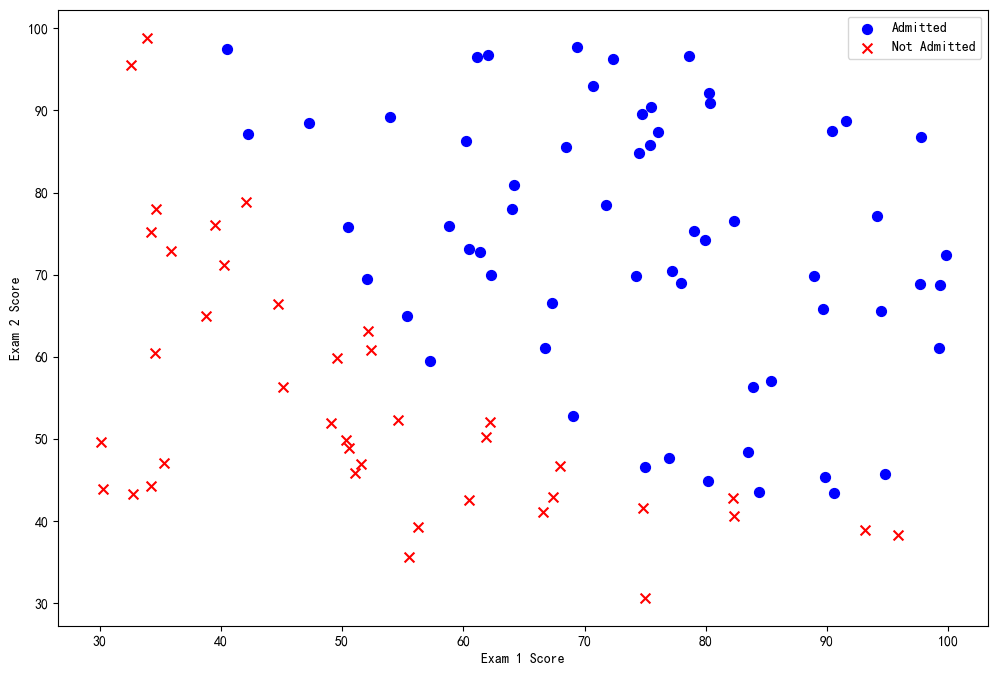

In [127]:
positive = data[data['Admitted'].isin([1])]
negative = data[data['Admitted'].isin([0])]
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(positive['Exam 1'],
           positive['Exam 2'],
           s=50,
           c='b',
           marker='o',
           label='Admitted')
ax.scatter(negative['Exam 1'],
           negative['Exam 2'],
           s=50,
           c='r',
           marker='x',
           label='Not Admitted')
ax.legend()
ax.set_xlabel('Exam 1 Score')
ax.set_ylabel('Exam 2 Score')
plt.show()

In [128]:
cols = data.shape[1]
X = data.iloc[:,0:cols-1]
y = data.iloc[:,cols-1:cols]
X = np.array(X.values)
y = np.array(y.values)

In [129]:
X.shape,y.shape
type(X)

numpy.ndarray

In [130]:
X = np.asarray(X)
y = np.asarray(y)
from sklearn.linear_model import LogisticRegression
log_res = LogisticRegression()
log_res.fit(X,y)

LogisticRegression()

In [131]:
print (log_res.coef_)

[[0.20535491 0.2005838 ]]


In [138]:
y_proba = log_res.predict_proba([[70,80]])
print(y_proba)

[[0.00463555 0.99536445]]


In [139]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [141]:
X = iris['data'][:,(2,3)]
y = iris['target']
print(X)
print(y)

[[1.4 0.2]
 [1.4 0.2]
 [1.3 0.2]
 [1.5 0.2]
 [1.4 0.2]
 [1.7 0.4]
 [1.4 0.3]
 [1.5 0.2]
 [1.4 0.2]
 [1.5 0.1]
 [1.5 0.2]
 [1.6 0.2]
 [1.4 0.1]
 [1.1 0.1]
 [1.2 0.2]
 [1.5 0.4]
 [1.3 0.4]
 [1.4 0.3]
 [1.7 0.3]
 [1.5 0.3]
 [1.7 0.2]
 [1.5 0.4]
 [1.  0.2]
 [1.7 0.5]
 [1.9 0.2]
 [1.6 0.2]
 [1.6 0.4]
 [1.5 0.2]
 [1.4 0.2]
 [1.6 0.2]
 [1.6 0.2]
 [1.5 0.4]
 [1.5 0.1]
 [1.4 0.2]
 [1.5 0.2]
 [1.2 0.2]
 [1.3 0.2]
 [1.4 0.1]
 [1.3 0.2]
 [1.5 0.2]
 [1.3 0.3]
 [1.3 0.3]
 [1.3 0.2]
 [1.6 0.6]
 [1.9 0.4]
 [1.4 0.3]
 [1.6 0.2]
 [1.4 0.2]
 [1.5 0.2]
 [1.4 0.2]
 [4.7 1.4]
 [4.5 1.5]
 [4.9 1.5]
 [4.  1.3]
 [4.6 1.5]
 [4.5 1.3]
 [4.7 1.6]
 [3.3 1. ]
 [4.6 1.3]
 [3.9 1.4]
 [3.5 1. ]
 [4.2 1.5]
 [4.  1. ]
 [4.7 1.4]
 [3.6 1.3]
 [4.4 1.4]
 [4.5 1.5]
 [4.1 1. ]
 [4.5 1.5]
 [3.9 1.1]
 [4.8 1.8]
 [4.  1.3]
 [4.9 1.5]
 [4.7 1.2]
 [4.3 1.3]
 [4.4 1.4]
 [4.8 1.4]
 [5.  1.7]
 [4.5 1.5]
 [3.5 1. ]
 [3.8 1.1]
 [3.7 1. ]
 [3.9 1.2]
 [5.1 1.6]
 [4.5 1.5]
 [4.5 1.6]
 [4.7 1.5]
 [4.4 1.3]
 [4.1 1.3]
 [4.  1.3]
 [4.4 1.2]

In [151]:
from sklearn.svm import SVC

classifier = SVC(probability=True)

classifier.fit(X, y)

# 预测新的样本
new_samples = ([[1.3,0.3]]) 
predicted_labels = classifier.predict(new_samples)
predicted_probabilities = classifier.predict_proba(new_samples)
print(predicted_labels)
print(predicted_probabilities)


[0]
[[0.97508486 0.0143669  0.01054824]]
